# Exploratory Data Analysis

## Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\CStudy(python)\C ML\Engineering College\Engg_College_Data - Engg_College_Data.csv')
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


### Know the datatypes of attributes:

In [3]:
df.dtypes

SR_NO              int64
Engg_College      object
Teaching           int64
Fees               int64
Placements         int64
Internship         int64
Infrastructure     int64
dtype: object

### Summary of data — basic statistics :

In [4]:
df.describe()

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,2.807692,3.576923,2.884615,2.769231,3.384615
std,7.648529,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.250000,2.000000,2.250000,1.250000,2.000000,3.000000
50%,13.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,19.750000,3.000000,5.000000,4.000000,4.000000,4.750000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Check whether there are NULL or missing values in dataset:

In [5]:
df.isnull().sum()

SR_NO             0
Engg_College      0
Teaching          0
Fees              0
Placements        0
Internship        0
Infrastructure    0
dtype: int64

In [6]:
df.shape

(26, 7)

In [7]:
df.columns

Index(['SR_NO', 'Engg_College', 'Teaching', 'Fees', 'Placements', 'Internship',
       'Infrastructure'],
      dtype='object')

<AxesSubplot:>

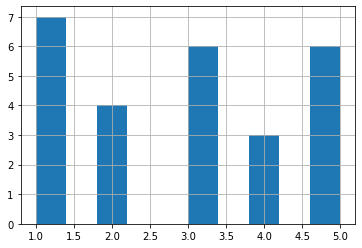

In [8]:
df['Placements'].hist()

<AxesSubplot:>

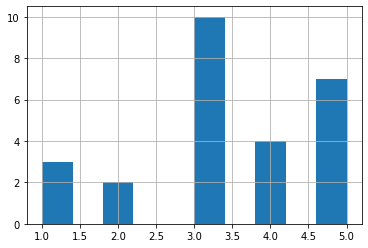

In [9]:
df['Infrastructure'].hist()

<AxesSubplot:>

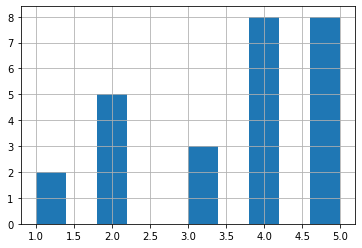

In [10]:
df['Fees'].hist()

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SR_NO,26.0,13.500000,7.648529,1.0,7.25,13.5,19.75,26.0
Teaching,26.0,2.807692,1.132051,1.0,2.00,3.0,3.00,5.0
Fees,26.0,3.576923,1.331858,1.0,2.25,4.0,5.00,5.0
Placements,26.0,2.884615,1.531716,1.0,1.25,3.0,4.00,5.0
Internship,26.0,2.769231,1.242826,1.0,2.00,2.0,4.00,5.0
Infrastructure,26.0,3.384615,1.298520,1.0,3.00,3.0,4.75,5.0


<AxesSubplot:>

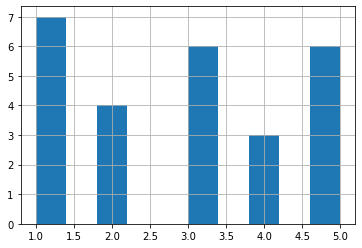

In [12]:
df['Placements'].hist()

In [13]:
df['Engg_College'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [14]:
df['Engg_College'].value_counts(normalize=True)

A    0.038462
B    0.038462
Y    0.038462
X    0.038462
W    0.038462
V    0.038462
U    0.038462
T    0.038462
S    0.038462
R    0.038462
Q    0.038462
P    0.038462
O    0.038462
N    0.038462
M    0.038462
L    0.038462
K    0.038462
J    0.038462
I    0.038462
H    0.038462
G    0.038462
F    0.038462
E    0.038462
D    0.038462
C    0.038462
Z    0.038462
Name: Engg_College, dtype: float64

<AxesSubplot:>

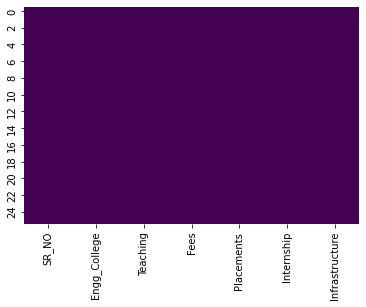

In [15]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

## Asking Analytical Questions and Visualizations

<AxesSubplot:>

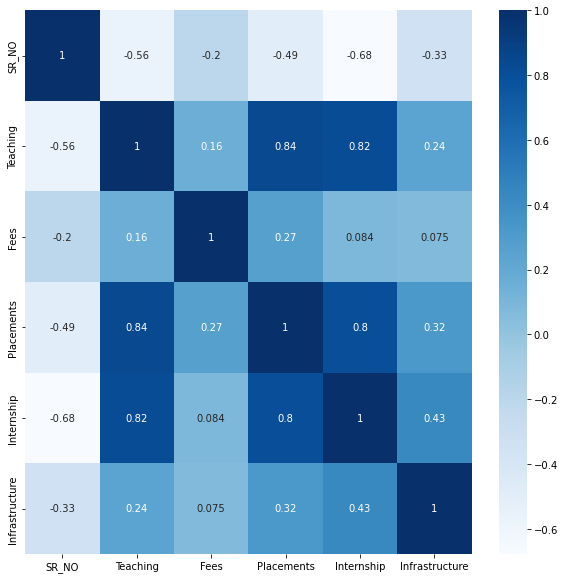

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [21]:
df.drop(['Engg_College'],axis=1,inplace=True)
df.head()

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
0,1,5,2,5,5,3
1,2,4,2,5,5,3
2,3,4,5,5,4,5
3,4,5,4,5,4,4
4,5,2,5,2,2,5


# Hierarchical Clustering

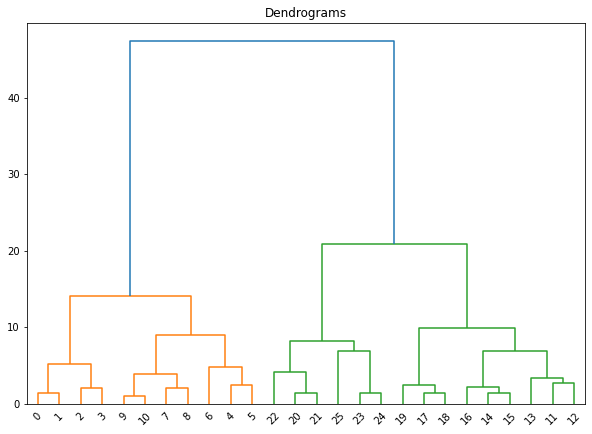

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

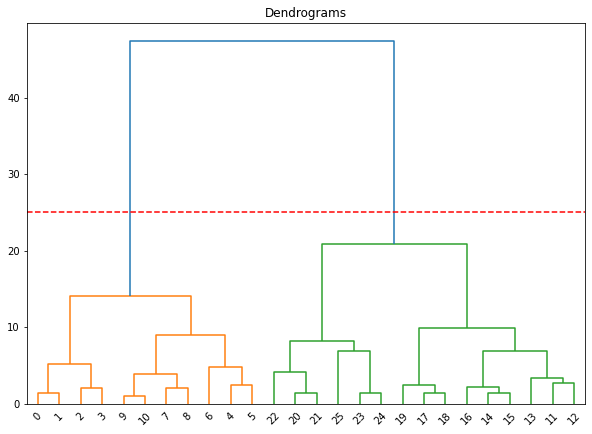

In [32]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=25, color='r', linestyle='--')

In [36]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

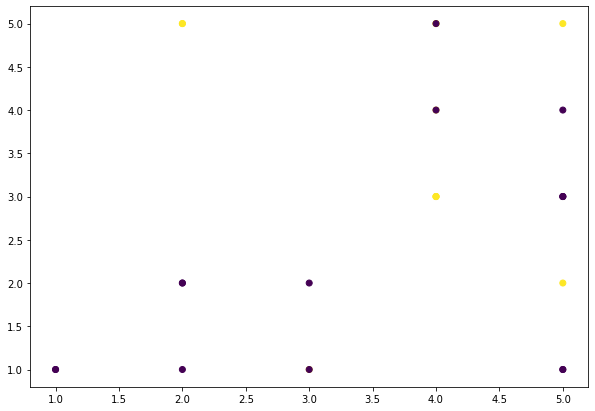

In [57]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['Fees'], df['Placements'], c=cluster.labels_) 